<h1 align="center">Algorithme du gradient</h1>

In [441]:
import string

import numpy as np
import sympy as sp
from sympy import Symbol
from matplotlib import pyplot as plt


# Quelque fonction utile aux algorithmes

In [382]:
def eval_X(n: int) -> sp.Matrix:
    """
    Crée un vecteur X element de R^n
    Exemple: X = (a, b) pour X appartenant à R^2
    :param n: Dimension du vecteur
    :return: vecteur généré suivant la dimensions données (a, b...)
    """
    return sp.Matrix([sp.Symbol(x) for x in string.ascii_lowercase[:n]])


In [383]:
def sdp(mat_a: np.ndarray) -> bool:
    """
    Retourne vrai si la matrice est symétrique et définie positive
    Pour la définition positive on utilise le critère de Sylvester
    :param mat_a: Matrice à vérifier
    :return: Vrai si la matrice est sdp et faux sinon
    """
    return all(np.linalg.det(mat_a[:i, :i]) > 0 for i in range(1, mat_a.shape[0] + 1))

In [ ]:
def mat_A(n: int) -> sp.Matrix:
    """
    Génère une matrice A de l'énoncé de dimensions n
    :param n: Dimensions de la matrice
    :return: Matrice A de dimensions N
    """
    liste_content: list[list[int]] = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i == j:
                liste_content[i][j] = 4
            elif abs(i - j) == 1:
                liste_content[i][j] = -2
    return sp.Matrix(liste_content)

In [75]:

def eval_J(n: int) -> sp.core:
    """
    Génère une expression J de l'énoncé de dimensions n
    :param n: Dimensions de l'expression
    :return: Expression J de dimensions N
    """
    X: sp.Matrix = eval_X(n)
    return ((0.5 * (X.transpose() * mat_A(n) * X)) - (X.transpose() * sp.ones(n, 1)))[0]

In [ ]:
def grad(expression: sp.core, n: int) -> sp.Matrix:
    """
    Renvoie le gradient d'une fonction de n variable donnée
    :param expression: Expression de la fonction
    :param n: Nombre de variable de la fonction
    :return: Gradient de la fonction
    """
    return sp.Matrix([expression.diff(symbol) for symbol in eval_X(n)])

In [474]:
def min_rho(A: np.array, d_k: np.array) -> float:
    """
    Renvoi le rho minimum pour un vecteur donné
    :param A: Matrice A du problème
    :param d_k: Vecteur gradient de l'itération
    :return: minimum des rho à prendre à l'itération correspondant au vecteur donné
    """

    numerator: np.array = d_k.T @ d_k
    denominator: np.array = d_k.T @ A @ d_k

    return numerator[0][0] / denominator[0][0]

Pour la représentation de Jn elle se retrouve au bas de page avec les représentations des champs de gradients


## Vérification de la positivité de la matrice A

In [ ]:

n: int = 100
positive: int = sum(sdp(np.array(mat_A(i)).astype(np.float64)) for i in range(n))
print(f"Pour n={n} on a un total de {positive}% de positivité")

**Résolvons le problème dans le cas ou n=2**<br/>
<pre>
Dans le cas ou n=2:
J(x,y)=2*x<sup>2</sup> + 2*y<sup>2</sup> - 2*x*y -x -y;
∇J(x,y)=(4*x-2*y-1;4*y-2*x-1);
∇J(x,y)=0<=>4*x-2*y-1=0 et 4*y-2*x-1=0 <=> x=1/2 et y=1/2
Hess(J(x,y))=([4,-2],[-2,4])
det(Hess(J(x,y)))=20>0 et 4>0 donc (1/2,1/2) est un minimum local et global
car J est définie positive pour n=2
</pre>

## Etude des Algorithmes des gradients

In [454]:
def grad_fixed_steps(n: int, ro: float, x0: np.array, epsilon: float) -> list[np.array]:
    """
    Renvoie le minimum selon l'algorithme du gradient à pas fixe
    :param epsilon: Précision de l'algorithme
    :param n: Nombre de variables de la fonction
    :param ro: pas de l'algorithme
    :param x0: Vecteur initiale de l'algorithme
    :return: Liste de toute kes itérations ménant au resultat
    """
    A: np.array = np.diag([-2] * (n - 1), k=-1) + np.diag([-2] * (n - 1), k=1) + np.diag([4] * n)
    B: np.array = np.array([1] * n).reshape(n, 1)
    X: dict[int | np.array] = {0: x0}  # Liste des itérés
    k = 0

    while True:
        d = B - np.dot(A, X[k])
        X[k + 1] = X[k] + ro * d

        if np.linalg.norm(X[k + 1] - X[k]) < epsilon:
            break
        k += 1
    return list(X.values())

In [529]:
def grad_variable_steps(n: int, x0: np.array, epsilon: float) -> list[np.array]:
    """
    Renvoie le minimum selon l'algorithme du gradient à pas variable
    :param n: Nombre de variables de la fonction
    :param x0: Vecteur initiale de l'algorithme
    :param epsilon: Précision de l'algorithme
    :return: minimum de la fonction
    """
    A: np.array = np.diag([-2] * (n - 1), k=-1) + np.diag([-2] * (n - 1), k=1) + np.diag([4] * n)
    B: np.array = np.array([1] * n).reshape(n, 1)
    X: dict[int | np.array] = {0: x0}  # Liste des itérés
    k = 0
    while (np.linalg.norm(d := B - np.dot(A, X[k])) > epsilon) and np.any(d):
        X[k + 1] = X[k] + min_rho(A, d) * d
        k += 1
    return list(X.values())

**Gradient à pas fixe pour n == 2**

Le minimum est [[0.5]
 [0.5]]


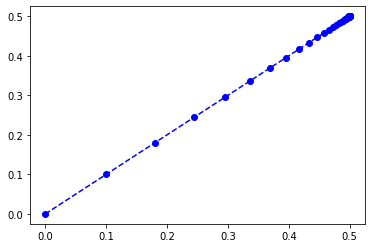

In [553]:

n = 2
iter_suit: list[np.array] = grad_fixed_steps(n, 0.1, np.zeros((n, 1)), 0.00000000001)
print(f"Le minimum est {iter_suit[-1]}")
x_values = [x[0][0] for x in iter_suit]
y_values = [y[1][0] for y in iter_suit]
plt.plot(x_values, y_values, 'bo', linestyle="--")


## Gradient à pas optimal n==2

Le minimum est [[0.5]
 [0.5]]


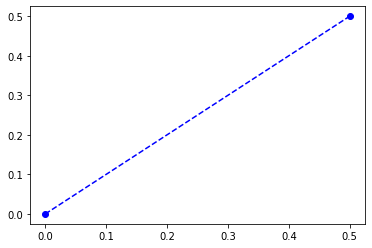

In [556]:
n = 2
iter_suit: list[np.array] = grad_variable_steps(n, np.zeros((n, 1)), 0.00000000001)
print(f"Le minimum est {iter_suit[-1]}")
x_values = [x[0][0] for x in iter_suit]
y_values = [y[1][0] for y in iter_suit]
plt.plot(x_values, y_values, 'bo', linestyle="--")


## Champ de Gradient et courbe de surface

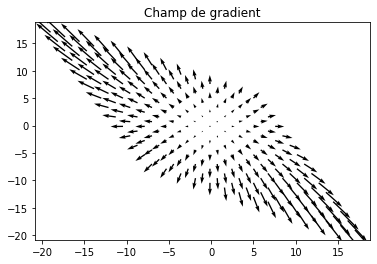

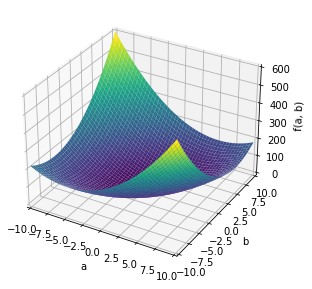

In [557]:

from sympy.plotting import plot3d

expression = sp.expand(eval_J(n))

a = Symbol("a")
b = Symbol("b")
xrange = np.linspace(-3, 3, 15)
yrange = np.linspace(-3, 3, 15)
g = grad(expression, 2)
X, Y = np.meshgrid(xrange, yrange)
U = X
V = Y

for i in range(len(xrange)):
    for j in range(len(yrange)):
        x1 = X[i, j]
        y1 = Y[i, j]
        U[i, j] = g[0].subs({a: x1, b: y1})
        V[i, j] = g[1].subs({a: x1, b: y1})
plt.quiver(X, Y, U, V, linewidth=3)
plt.title("Champ de gradient")
plt.show()
p1 = plot3d(expression, (a, -10, 10), (b, -10, 10))



# Test entre les deux méthodes

**Gradient à pas fixe**

In [559]:
from time import perf_counter

for n in [10, 20, 30, 50, 100]:
    start = perf_counter()
    grad_fixed_steps(n, 0.1, np.zeros((n, 1)), 0.01)
    print(f"Pour n={n} l'algorithme du gradient fixe s'effectue en {perf_counter() - start} nanoseconds")


Pour n=10 l'algorithme du gradient fixe s'effectue en 0.0046833000087644905 nanoseconds
Pour n=20 l'algorithme du gradient fixe s'effectue en 0.01565890002530068 nanoseconds
Pour n=30 l'algorithme du gradient fixe s'effectue en 0.029809200001182035 nanoseconds
Pour n=50 l'algorithme du gradient fixe s'effectue en 0.08391620000475086 nanoseconds
Pour n=100 l'algorithme du gradient fixe s'effectue en 2.4668511999771 nanoseconds


**Gradient à pas optimal**

In [560]:
from time import perf_counter

for n in [10, 20, 30, 50, 100]:
    start = perf_counter()
    grad_variable_steps(n, np.zeros((n, 1)), 0.01)
    print(f"Pour n={n} l'algorithme du gradient à pas optimal s'effectue en {perf_counter()- start} nanoseconds")


Pour n=10 l'algorithme du gradient à pas optimal s'effectue en 0.005350600025849417 nanoseconds
Pour n=20 l'algorithme du gradient à pas optimal s'effectue en 0.013205800001742318 nanoseconds
Pour n=30 l'algorithme du gradient à pas optimal s'effectue en 0.029533499997342005 nanoseconds
Pour n=50 l'algorithme du gradient à pas optimal s'effectue en 0.09340260000317357 nanoseconds
Pour n=100 l'algorithme du gradient à pas optimal s'effectue en 2.42305509999278 nanoseconds


# Conclusions
On remarque qu'en faisant varier le pas et en choisissant un bon pas la méthode du gradient à pas fixe peut s'avérer très rapide. Toutefois, dans la majorité des cas le gradient à pas optimal vas être plus efficaces dans la majeure partie des scénarios